# 1. Import Package

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.plot import plot_correlation_matrix, plot_correlation_ratio, plot_association_matrix
from jcopml.plot import plot_missing_value

# 2. Import Dataset

In [4]:
df = pd.read_csv("Data/train.csv", index_col="Id")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
pd.options.display.max_columns = 100
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 3. Exploratory Data Analysis (EDA)

### Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
df.shape

(1460, 80)

`The dataseet have 1460 rows and 80 columns`

### Data Description

In [6]:
df.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


### Check Missing Value

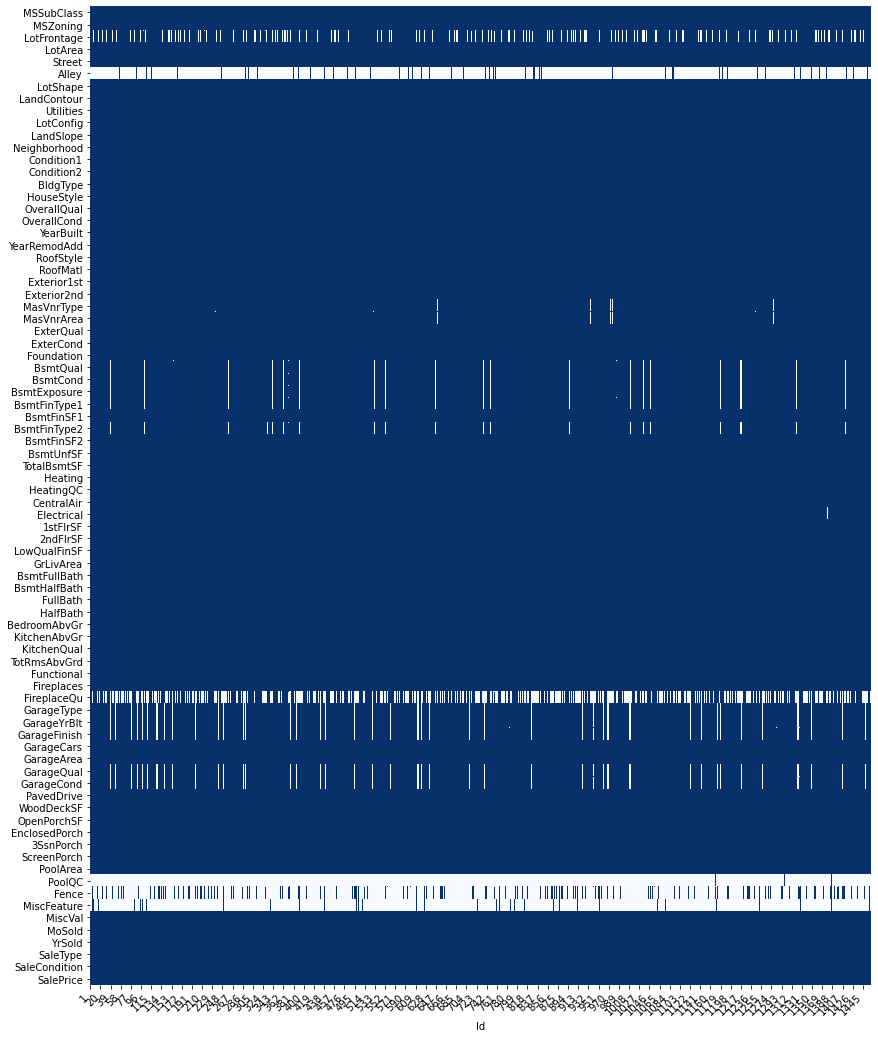

In [7]:
plot_missing_value(df, figsize= (14,18))

`Several columns have a lot missing value can be eliminate.`

### Missing values analysis

`In this part, I want to calculates the columns that have at least <=50% of missing values that can be accepted. Other than that I'll eliminate it.`

In [8]:
missing_values = df.isnull().sum()/df.shape[0]*100
missing_values[missing_values >= 50].sort_values(ascending = False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
dtype: float64

In [9]:
df.drop(columns= ['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace= True)
df.shape

(1460, 76)

## A. Numerical Features

### Sale Price Distribution (Target Distribution)

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

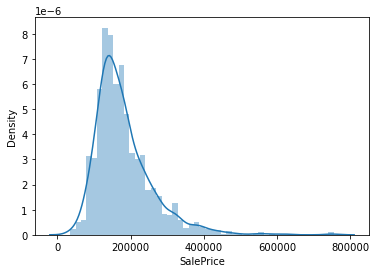

In [10]:
sns.distplot(df['SalePrice'], kde = True)

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

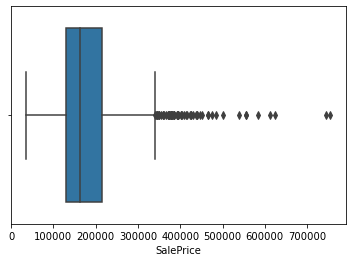

In [11]:
sns.boxplot(df['SalePrice'])

### Correlation matrix

<AxesSubplot:>

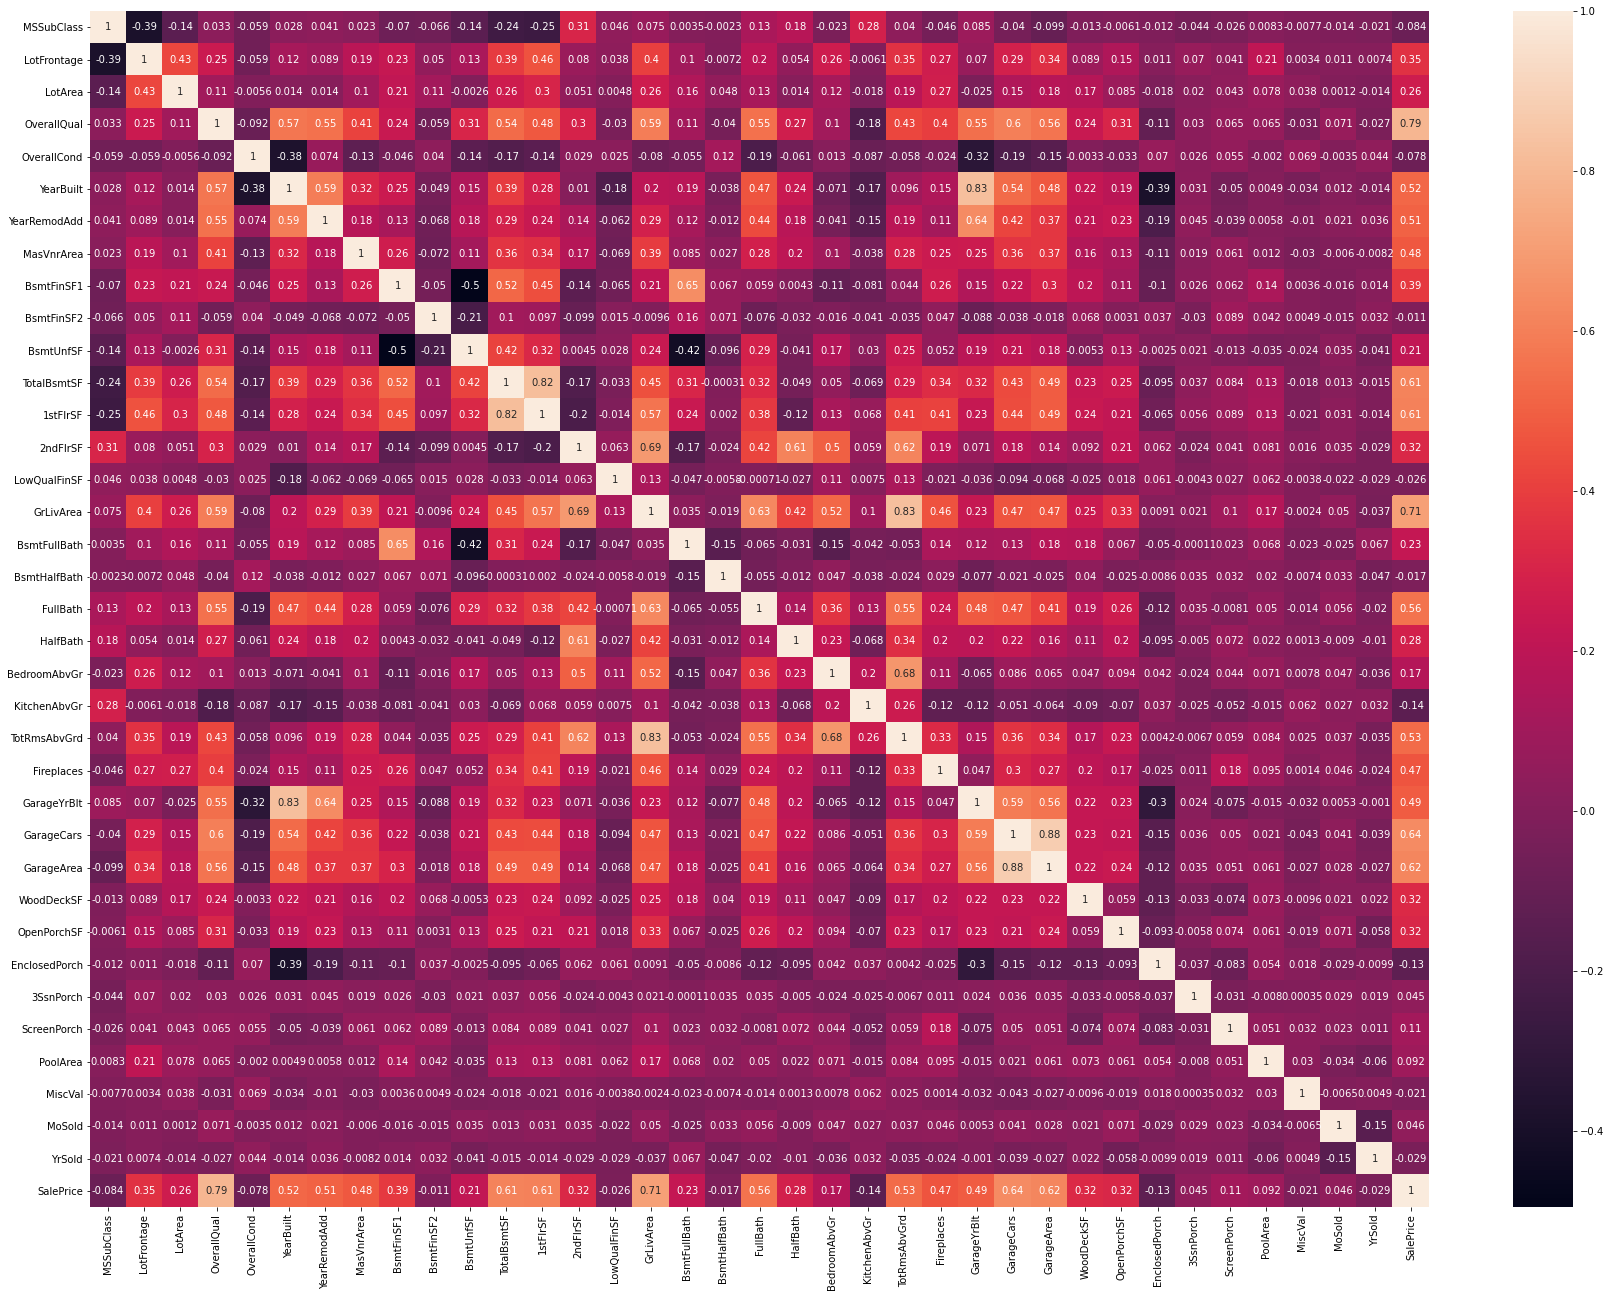

In [12]:
corrmat = df.corr()
corr_features = corrmat.index
plt.figure(figsize=(30, 22))

sns.heatmap(df[corr_features].corr(), annot=True)

### Calculate the correlation between features

`A strong correlation between features causes multicollinearity for models that can be test scores so poor. Therefore, I'll calculate it.`

In [13]:
corr = df.corr()
strong_corr = corr.unstack()
strong_corr[(abs(strong_corr) > 0.8) & (abs(strong_corr) < 1)]

YearBuilt     GarageYrBlt     0.825667
TotalBsmtSF   1stFlrSF        0.819530
1stFlrSF      TotalBsmtSF     0.819530
GrLivArea     TotRmsAbvGrd    0.825489
TotRmsAbvGrd  GrLivArea       0.825489
GarageYrBlt   YearBuilt       0.825667
GarageCars    GarageArea      0.882475
GarageArea    GarageCars      0.882475
dtype: float64

`Based on Correlation Matrix and calculating how many strong between features, I'll eliminate one column between features that have a strong correlation because it can cause multicollinearity`

In [14]:
df.drop(columns= ['GarageYrBlt', '1stFlrSF','TotRmsAbvGrd','GarageArea'], inplace= True)

In [15]:
df.shape

(1460, 72)

## Data Distribution

In [16]:
numeric_features = df.select_dtypes(include=[np.number])

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

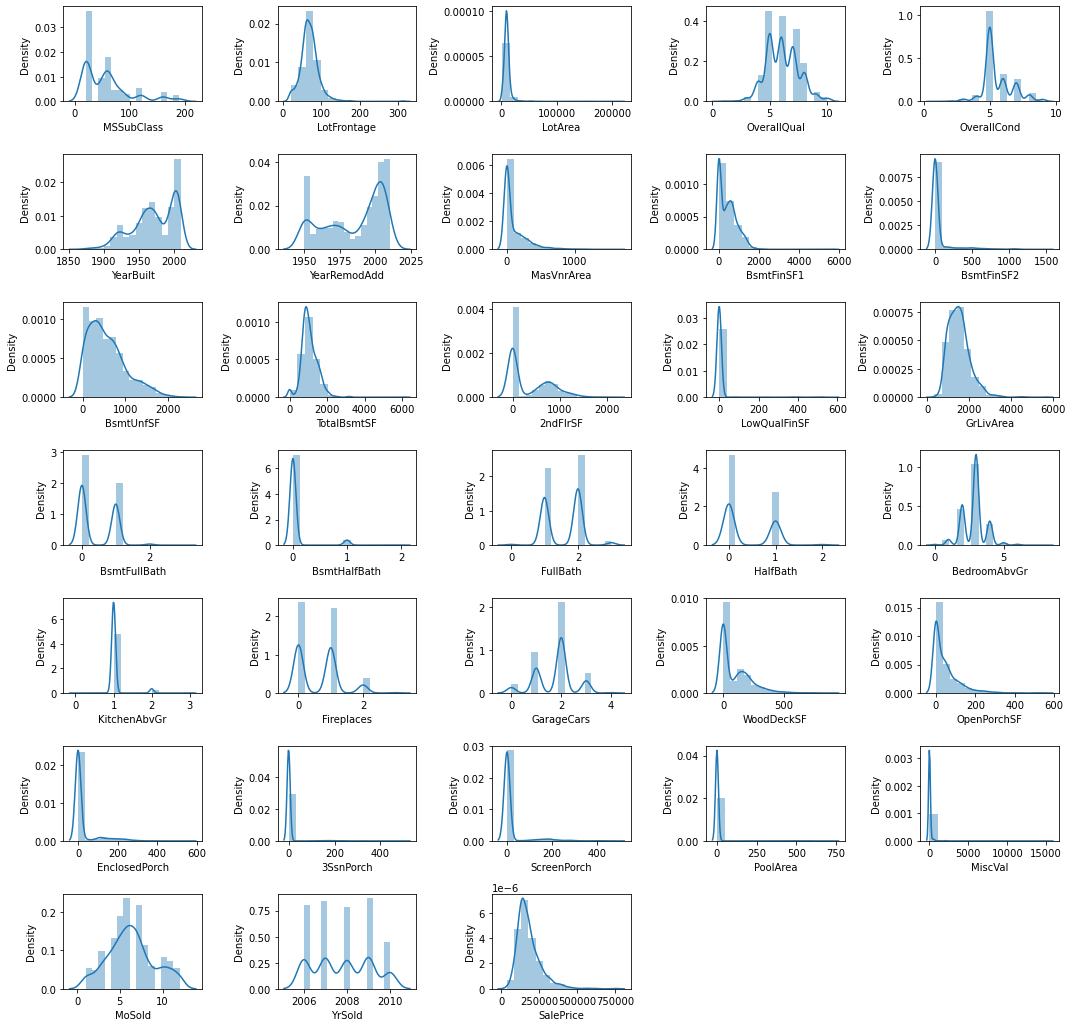

In [17]:
x = plt.figure(figsize=(15, 16))

for i, j in enumerate(numeric_features):
    x.add_subplot(8, 5, i+1)
    sns.distplot(df[j], bins=15)
    x.tight_layout()

plt.tight_layout()

`Although several columns have a skewed, I don't handle it because maybe the number of values is supposed to be. But, if the model has a higher value of error, I'll handle that in the evaluation part.`

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

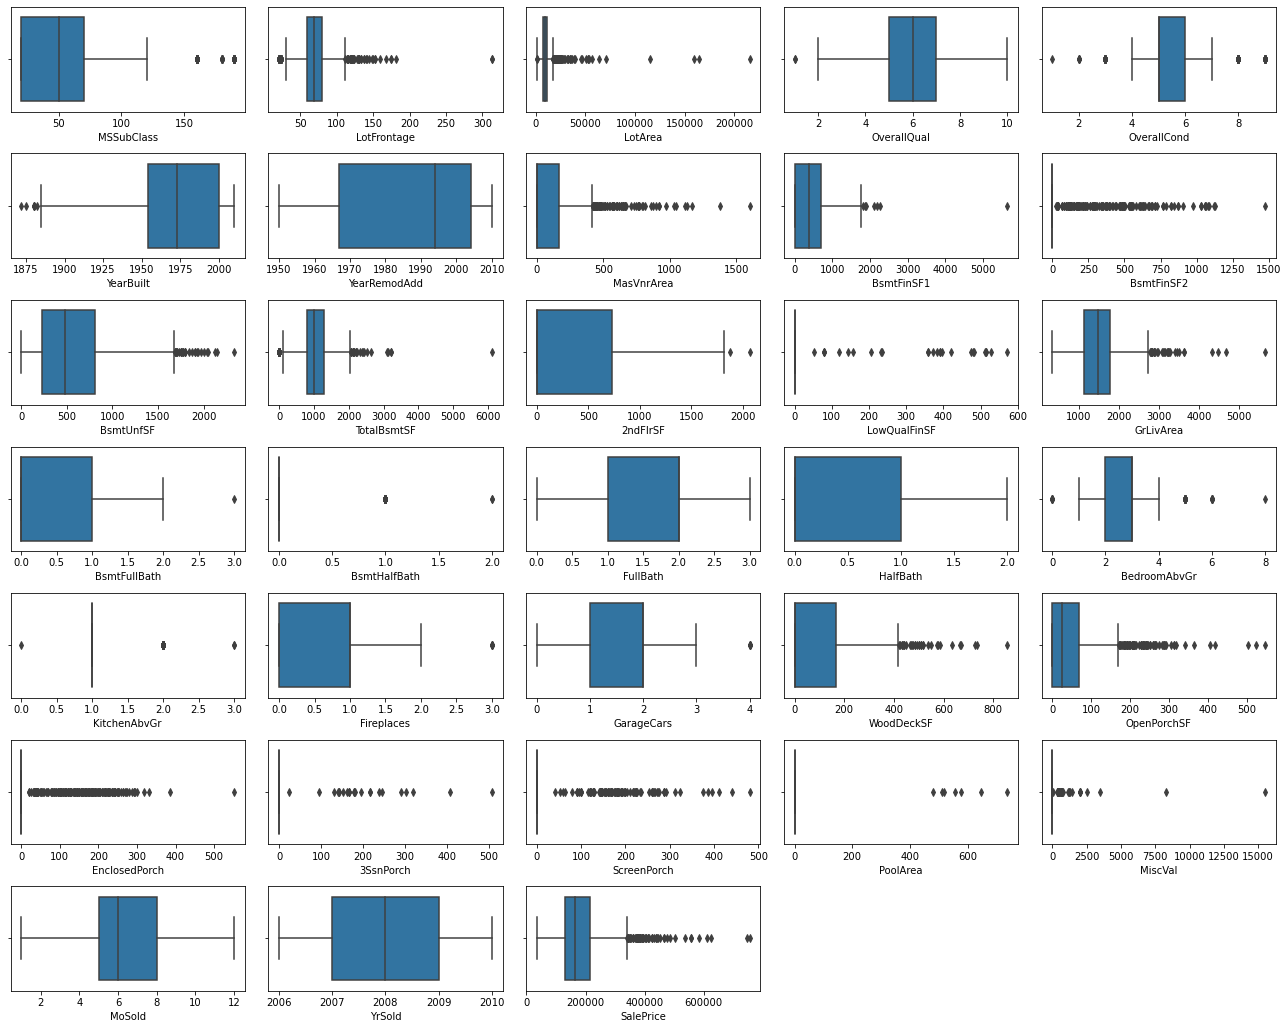

In [18]:
x = plt.figure(figsize=(18, 16))

for i, j in enumerate(numeric_features):
    x.add_subplot(8, 5, i+1)
    sns.boxplot(df[j])
    x.tight_layout()

plt.tight_layout()

`So many columns having outliers. But, I don't handle them yet right now because maybe the number of value supposed to be like that. But, if the model has higher value of error, I’ll handle in the evaluation part.`

### Calculate feature correlation against the target variable

In [19]:
corr = df.corr()

In [20]:
print('High Correlation:')
print(corr['SalePrice'].sort_values(ascending=False)[1:11], '\n')

print('Low Correlation:')
print(corr['SalePrice'].sort_values(ascending=False)[-10:])

High Correlation:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
TotalBsmtSF     0.613581
FullBath        0.560664
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 

Low Correlation:
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


## Top 10 High Correlation Against Target Variable

### OverallQual vs SalePrice

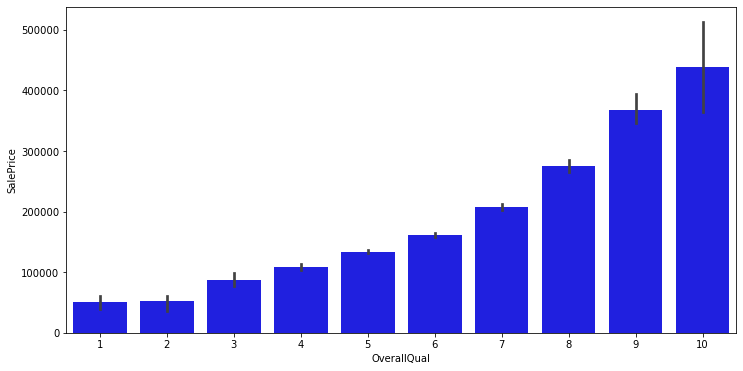

In [21]:
plt.figure(figsize=(12, 6))
plot = sns.barplot(x='OverallQual', y = 'SalePrice', color= 'b', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### GrLivArea vs SalePrice

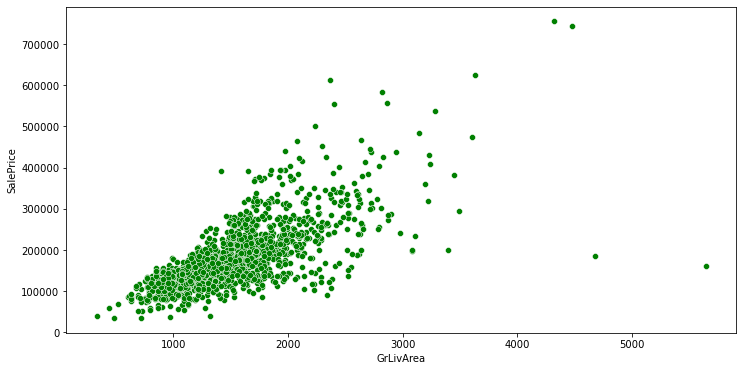

In [22]:
plt.figure(figsize=(12, 6))
plot = sns.scatterplot(x='GrLivArea', y = 'SalePrice', color= 'g', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### GarageCars vs SalePrice

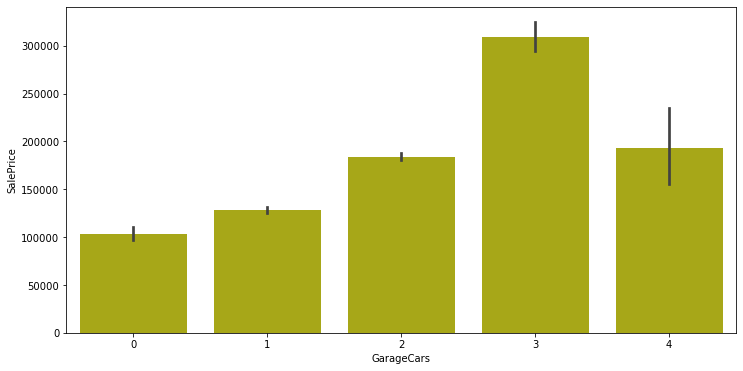

In [23]:
plt.figure(figsize=(12, 6))
plot = sns.barplot(x='GarageCars', y = 'SalePrice', color= 'y', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### TotalBsmtSF vs SalePrice

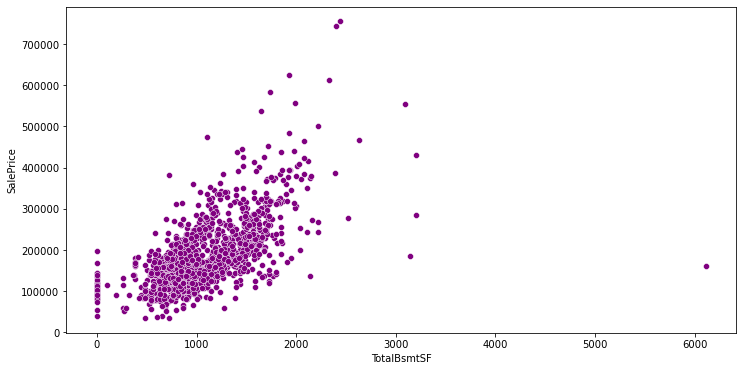

In [24]:
plt.figure(figsize=(12, 6))
plot = sns.scatterplot(x='TotalBsmtSF', y = 'SalePrice', color= 'Purple', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### FullBath vs SalePrice

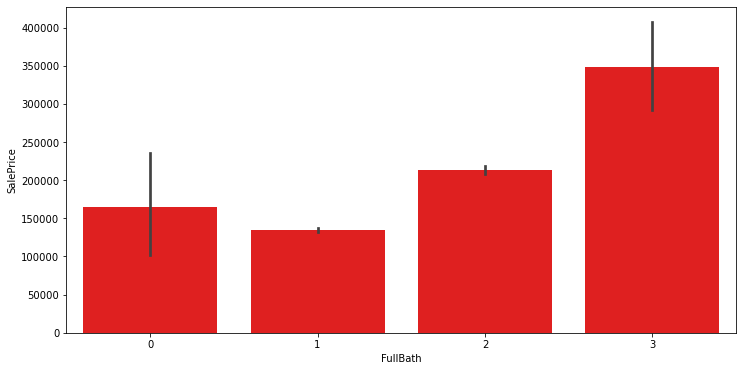

In [25]:
plt.figure(figsize=(12, 6))
plot = sns.barplot(x='FullBath', y = 'SalePrice', color= 'r', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### YearBuilt vs SalePrice

In [26]:
plt.style.use('dark_background')

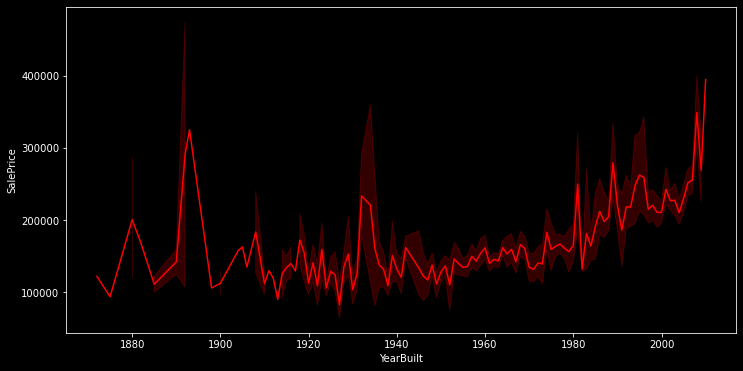

In [27]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x='YearBuilt', y = 'SalePrice', color= 'r', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### YearRemodAdd vs SalePrice

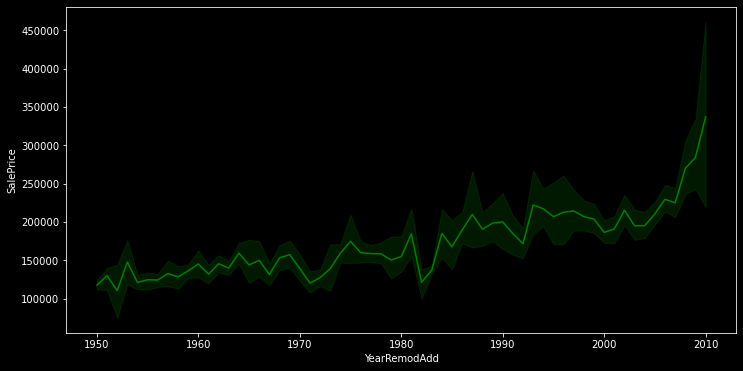

In [28]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x='YearRemodAdd', y = 'SalePrice', color= 'g', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### MasVnrArea vs SalePrice

In [29]:
plt.style.use('default')

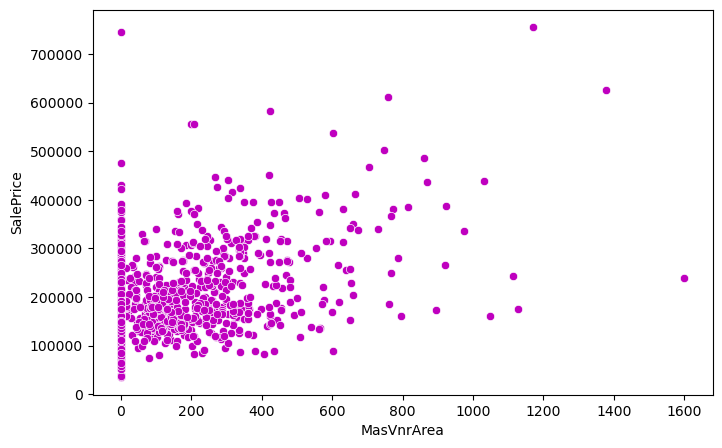

In [30]:
plt.figure(figsize=(8, 5))
plot = sns.scatterplot(x='MasVnrArea', y = 'SalePrice', color= 'm', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### Fireplaces vs SalePrice

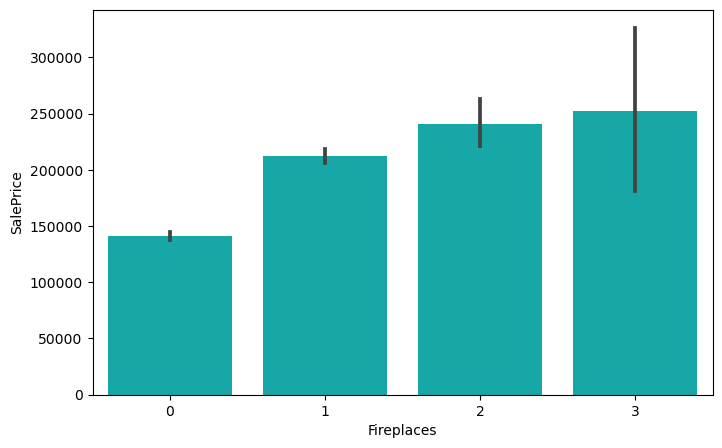

In [31]:
plt.figure(figsize=(8, 5))
plot = sns.barplot(x='Fireplaces', y = 'SalePrice', color= 'c', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### BsmtFinSF1 vs SalePrice

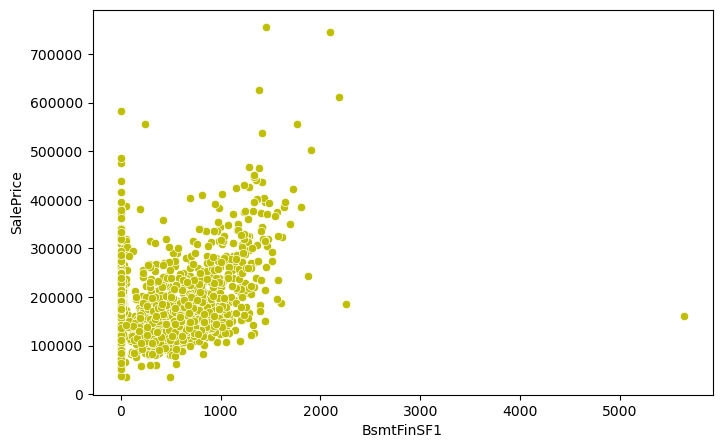

In [32]:
plt.figure(figsize=(8, 5))
plot = sns.scatterplot(x='BsmtFinSF1', y = 'SalePrice', color= 'y', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

## Top 10 Low Correlation Against Target Variable

### 3SsnPorch vs SalePrice

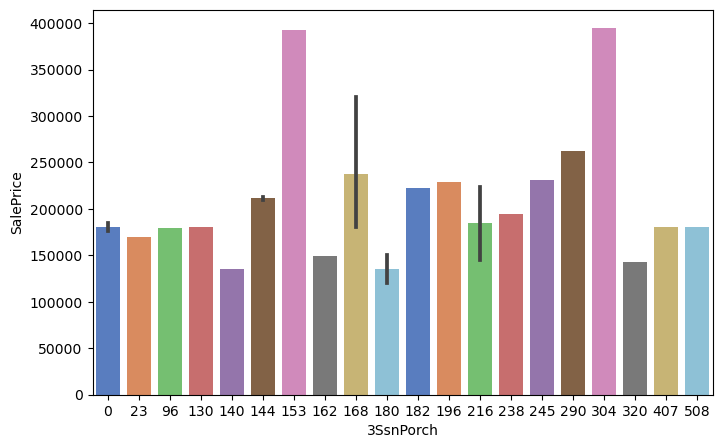

In [33]:
plt.figure(figsize=(8, 5))
plot = sns.barplot(x='3SsnPorch', y = 'SalePrice', palette='muted', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### BsmtFinSF2 vs SalePrice

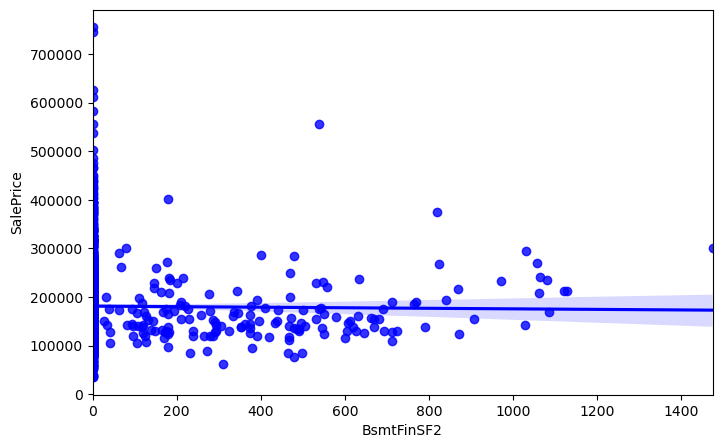

In [34]:
plt.figure(figsize=(8, 5))
plot = sns.regplot(x='BsmtFinSF2', y = 'SalePrice', color= 'b', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### BsmtHalfBath vs SalePrice

In [35]:
df.BsmtHalfBath.unique()

array([0, 1, 2], dtype=int64)

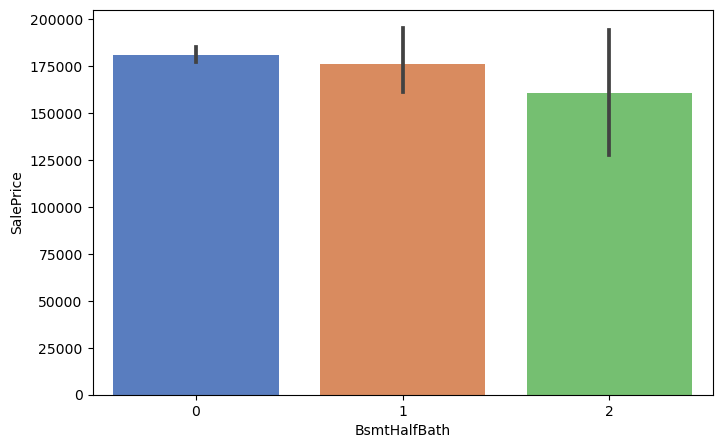

In [36]:
plt.figure(figsize=(8, 5))
plot = sns.barplot(x='BsmtHalfBath', y = 'SalePrice',palette = 'muted', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### MiscVal vs SalePrice

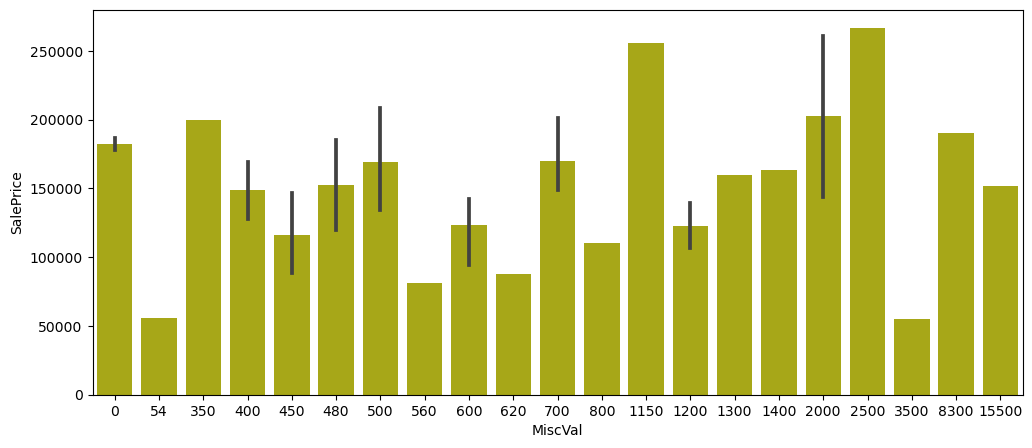

In [37]:
plt.figure(figsize=(12, 5))
plot = sns.barplot(x='MiscVal', y = 'SalePrice',color= 'y', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### LowQualFinSF vs SalePrice

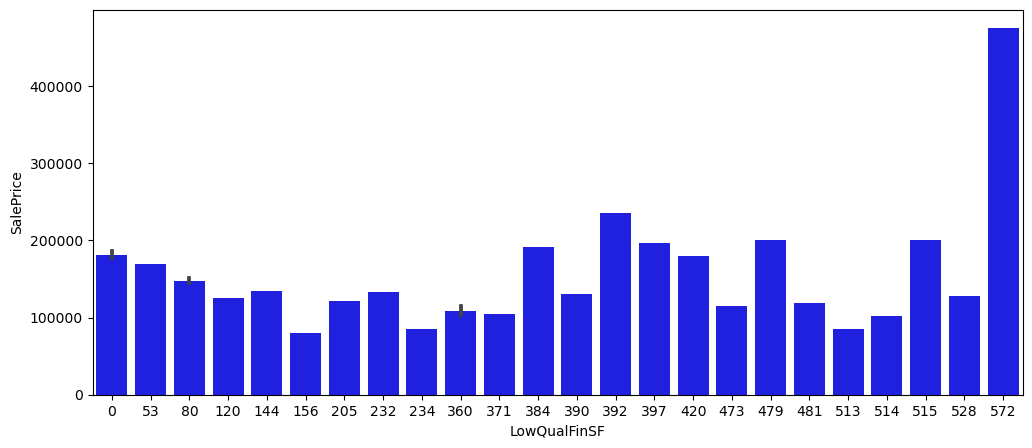

In [38]:
plt.figure(figsize=(12, 5))
plot = sns.barplot(x='LowQualFinSF', y = 'SalePrice',color= 'b', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### YrSold vs SalePrice

In [39]:
plt.style.use('dark_background')

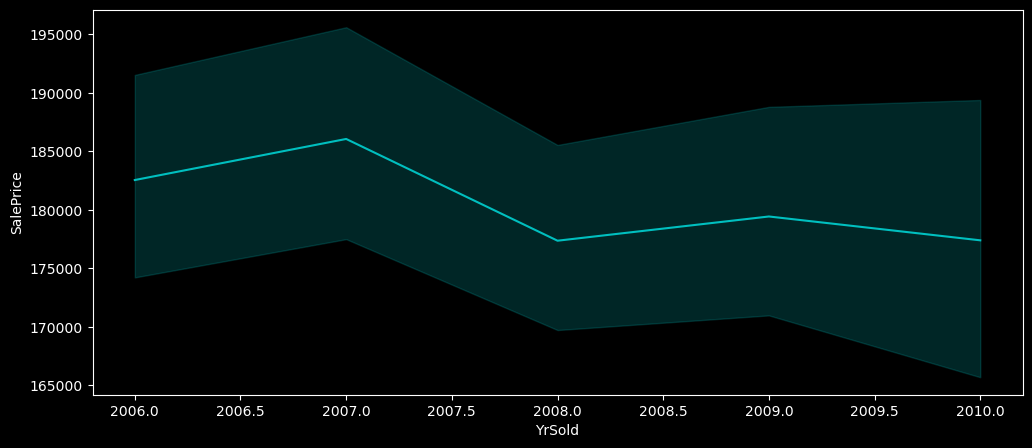

In [40]:
plt.figure(figsize=(12, 5))
plot = sns.lineplot(x='YrSold', y = 'SalePrice',color= 'c', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### OverallCond vs SalePrice

In [41]:
plt.style.use('default')

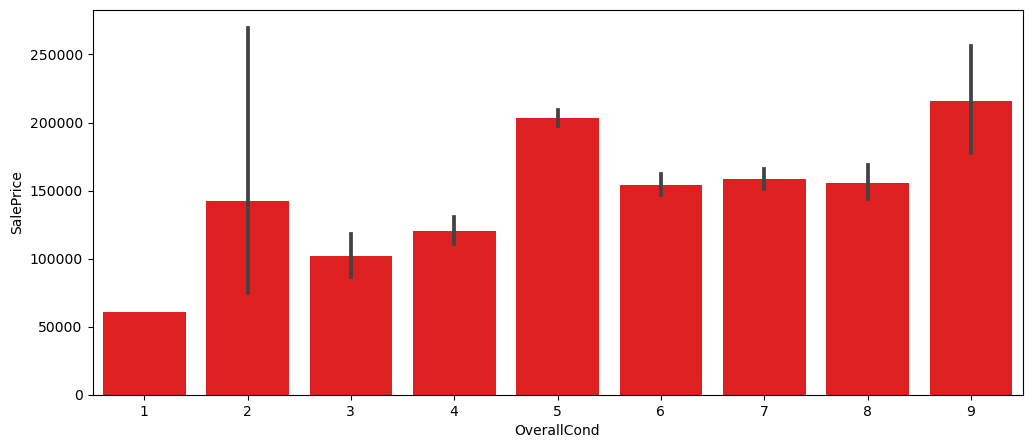

In [42]:
plt.figure(figsize=(12, 5))
plot = sns.barplot(x='OverallCond', y = 'SalePrice',color= 'red', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### MSSubClass vs SalePrice

In [43]:
df.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

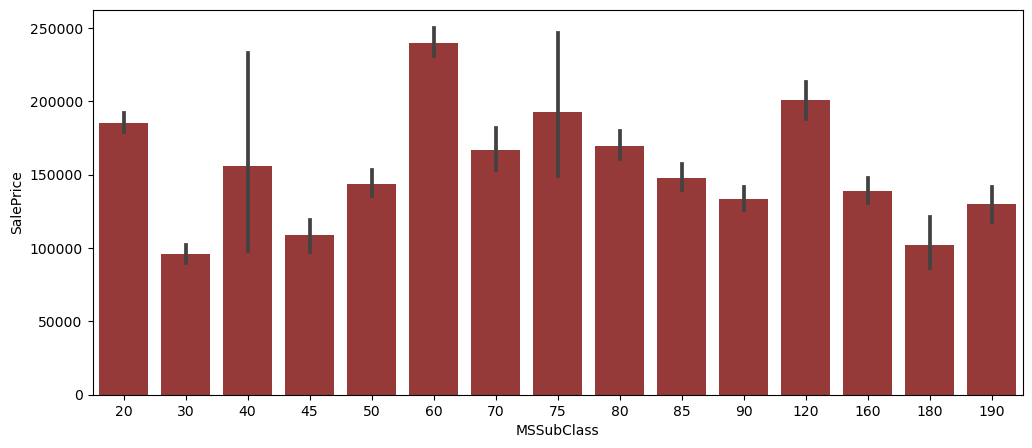

In [44]:
plt.figure(figsize=(12, 5))
plot = sns.barplot(x='MSSubClass', y = 'SalePrice',color= 'brown', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### EnclosedPorch vs SalePrice

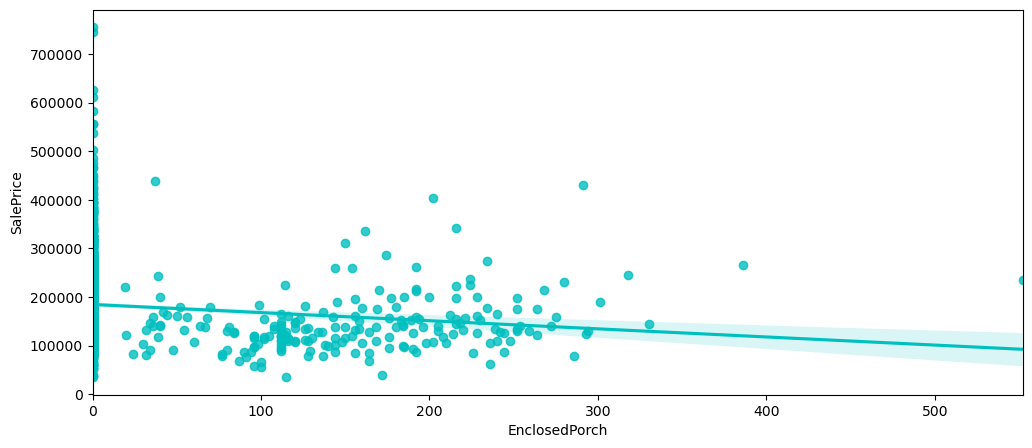

In [45]:
plt.figure(figsize=(12, 5))
plot = sns.regplot(x='EnclosedPorch', y = 'SalePrice',color= 'c', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### KitchenAbvGr vs SalePrice

In [46]:
df.KitchenAbvGr.unique()

array([1, 2, 3, 0], dtype=int64)

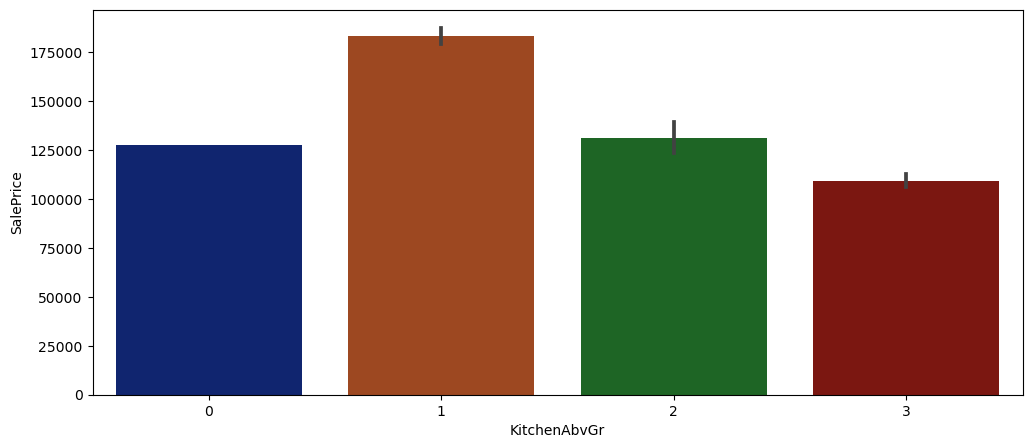

In [47]:
plt.figure(figsize=(12, 5))
plot = sns.barplot(x='KitchenAbvGr', y = 'SalePrice',palette='dark', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

## B. Categorical Features

In [48]:
categoric_features = df.select_dtypes(include=[np.object])
categoric_features.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

## Categoric vs Target

,SalePrice
MSZoning,0.107560
Street,0.001684
LotShape,0.076376
LandContour,0.025794
Utilities,0.000205
LotConfig,0.021019
LandSlope,0.002682
Neighborhood,0.545575
Condition1,0.032631
Condition2,0.009899


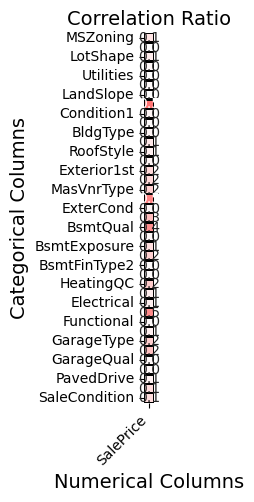

In [49]:
plot_correlation_ratio(df, categoric_features, ['SalePrice'], report=True)

`Top 5 columns that high and low correlation against target:` <br>

**High Correlation:**
1. Neighborhood	
2. ExterQual
3. KitchenQual	
4. BsmtQual
5. Foundation	

**Low Correlation:**
1. Utilities	
2. Street
3. LandSlope
4. Functional
5. LotConfig	

## Top 5 High Correlation Against Target 

### Neighborhood vs SalePrice

In [50]:
plt.style.use('fivethirtyeight')

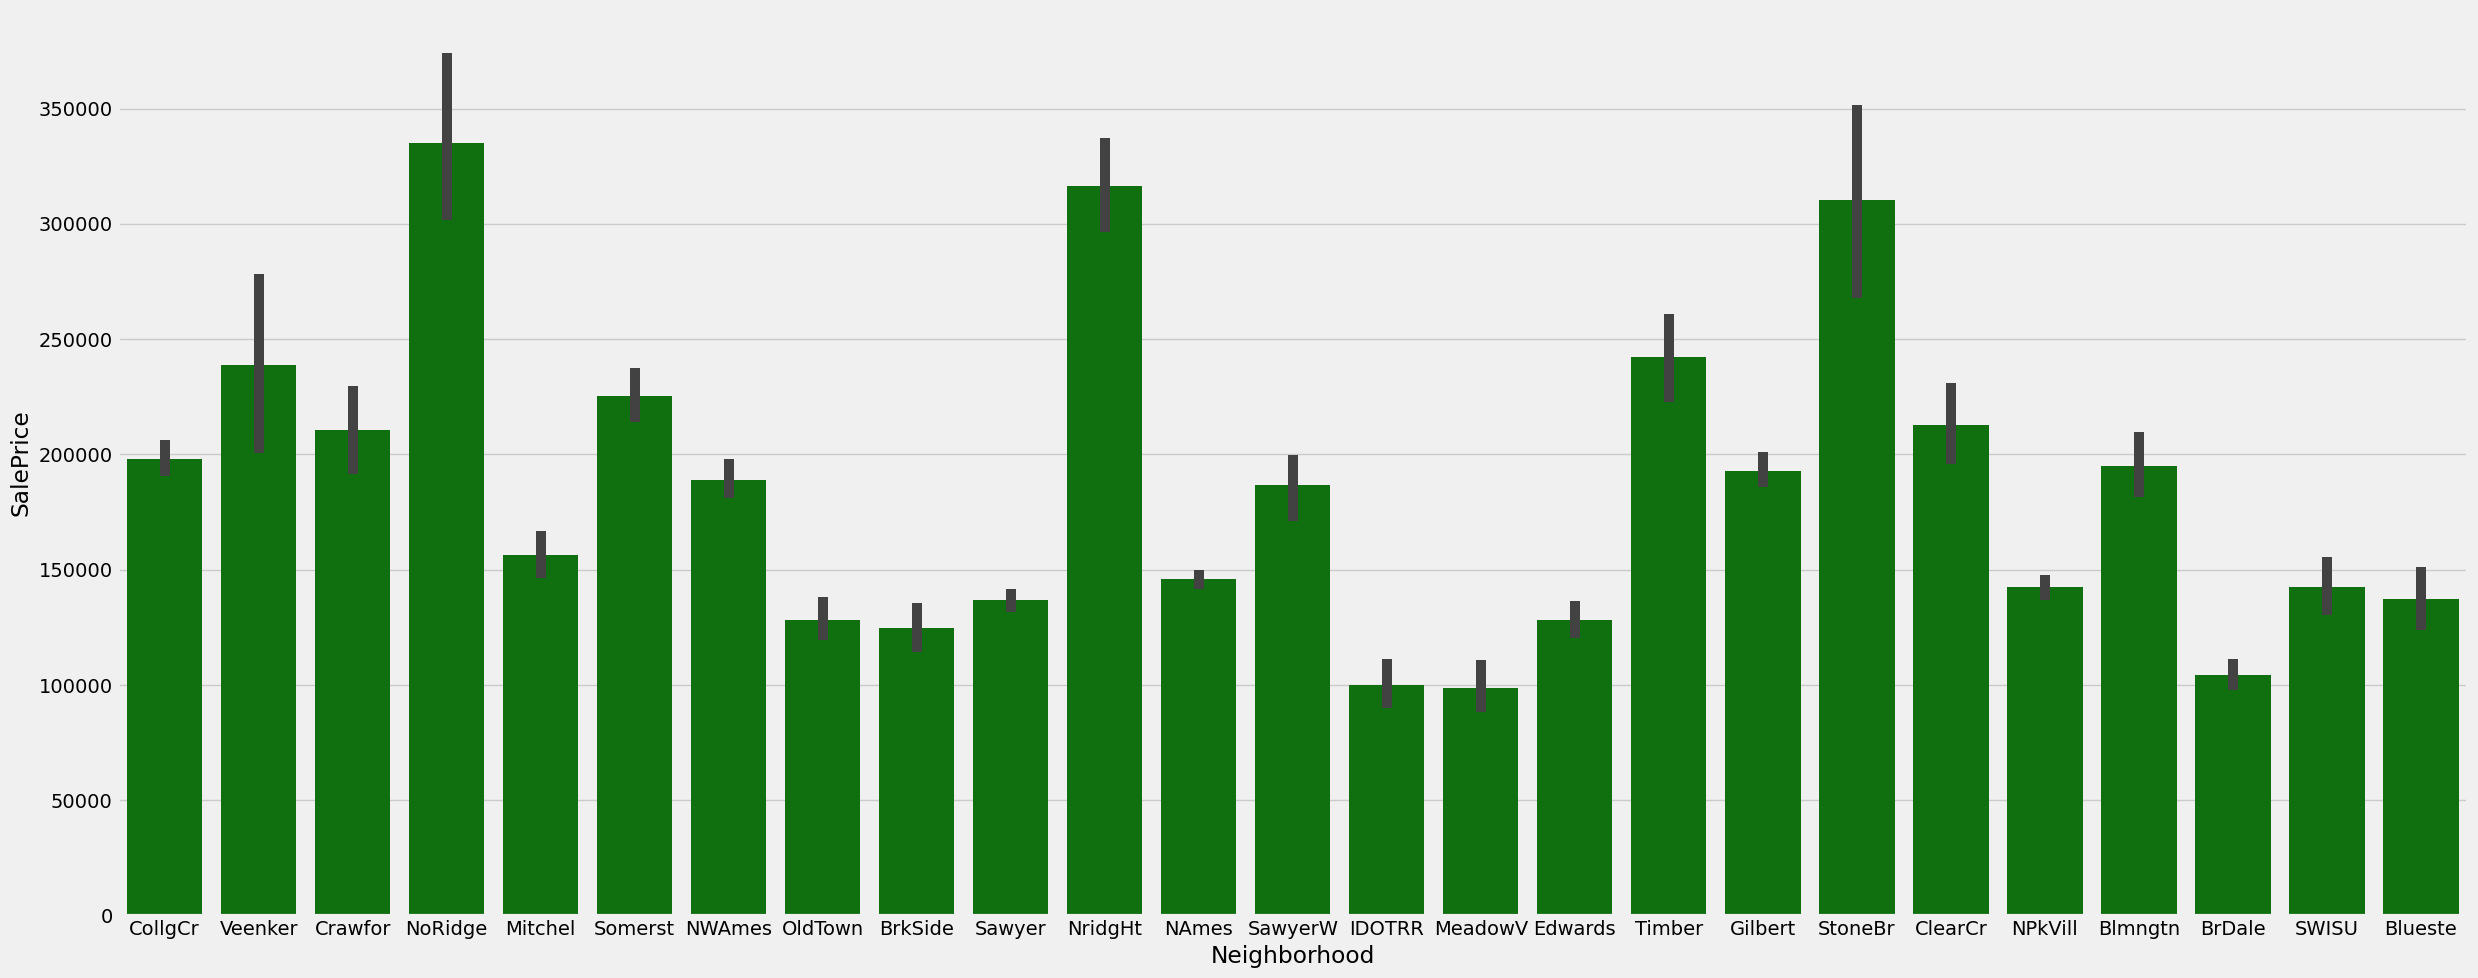

In [51]:
plt.figure(figsize=(25, 10))
plot = sns.barplot(x='Neighborhood', y = 'SalePrice',color= 'g', data=df)
plt.setp(plot.get_xticklabels(), rotation=0)
plt.tight_layout();

### ExterQual vs SalePrice

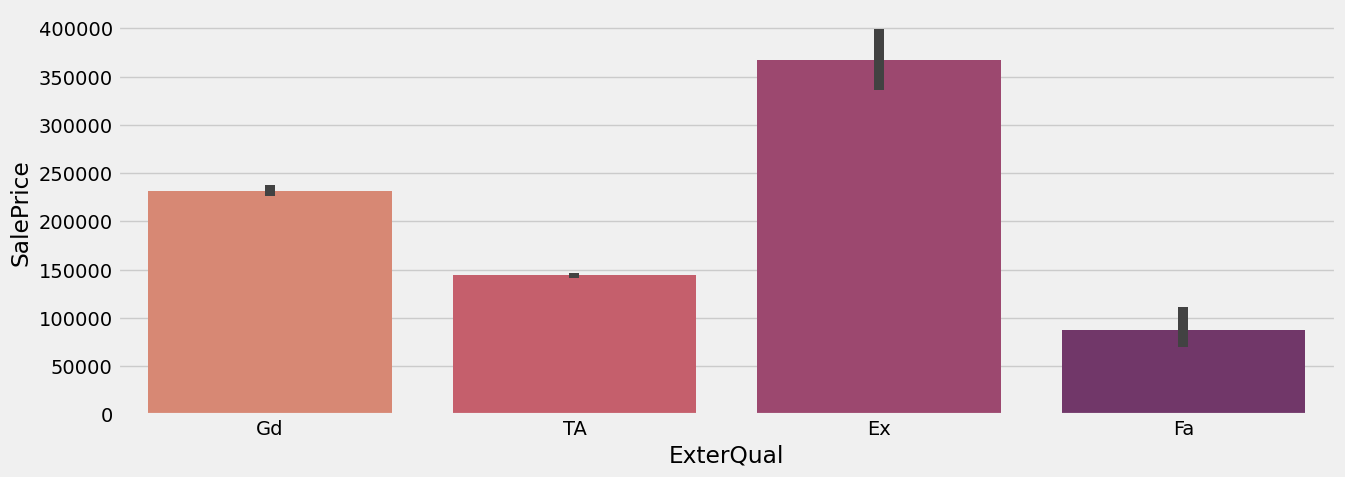

In [52]:
plt.figure(figsize=(14, 5))
plot = sns.barplot(x='ExterQual', y = 'SalePrice',palette='flare', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### KitchenQual vs SalePrice

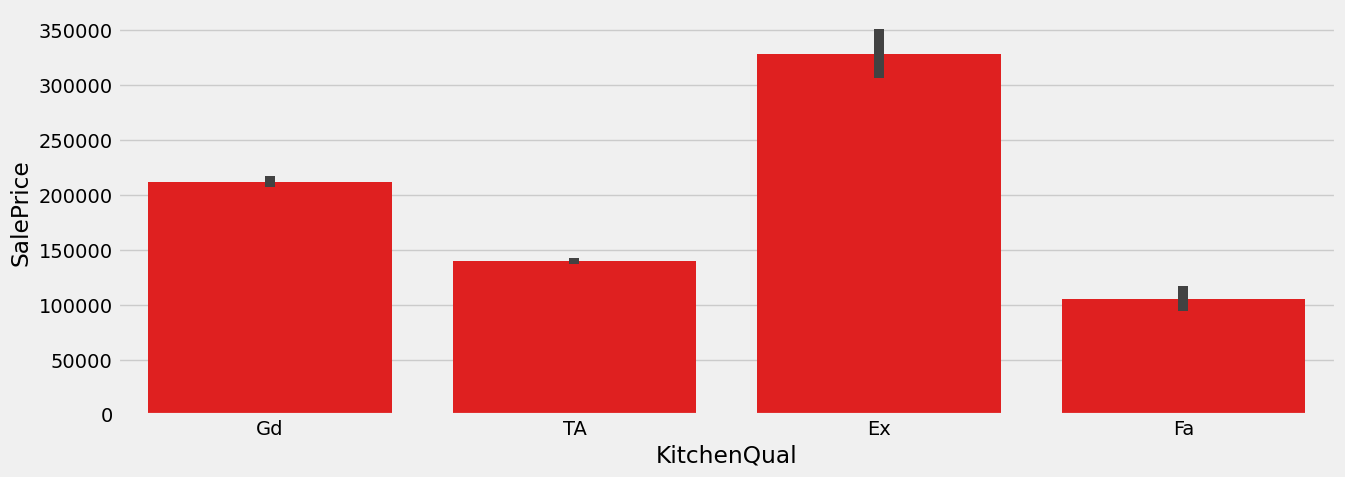

In [53]:
plt.figure(figsize=(14, 5))
plot = sns.barplot(x='KitchenQual', y = 'SalePrice',color= 'red', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### BsmtQual vs SalePrice

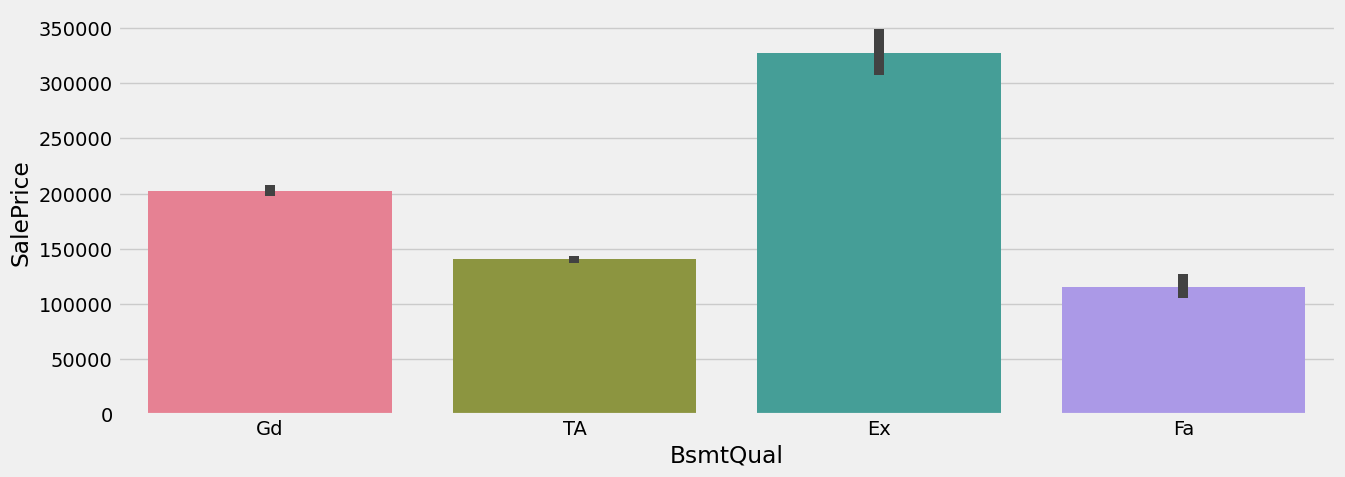

In [54]:
plt.figure(figsize=(14, 5))
plot = sns.barplot(x='BsmtQual', y = 'SalePrice',palette = 'husl', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### Foundation vs SalePrice

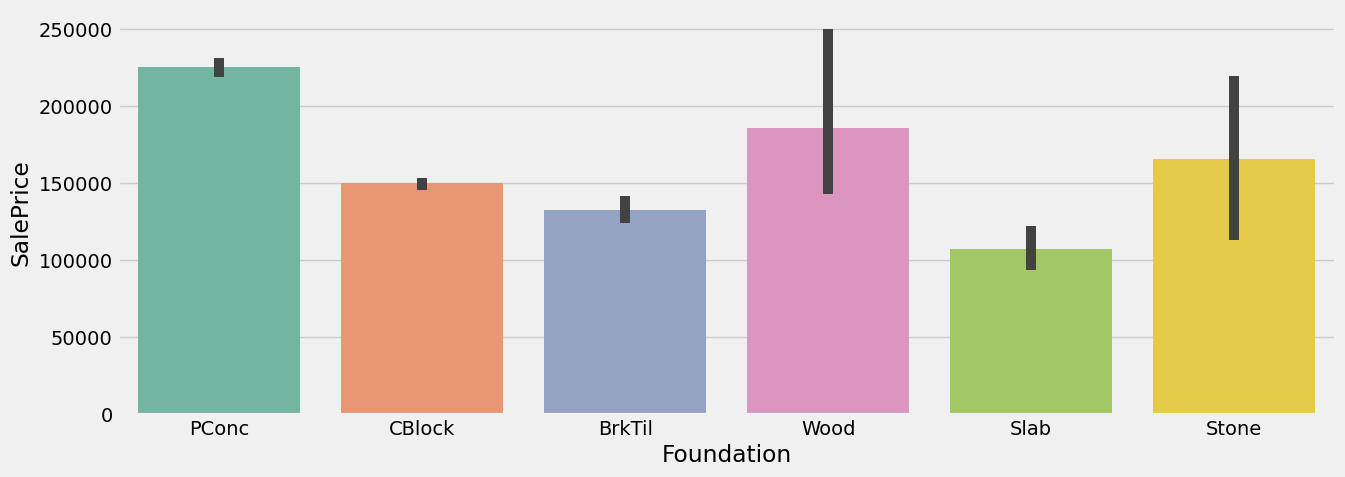

In [55]:
plt.figure(figsize=(14, 5))
plot = sns.barplot(x='Foundation', y = 'SalePrice',palette = 'Set2', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

## Top 5 Low Correlation Against Target

### Utilities vs SalePrice

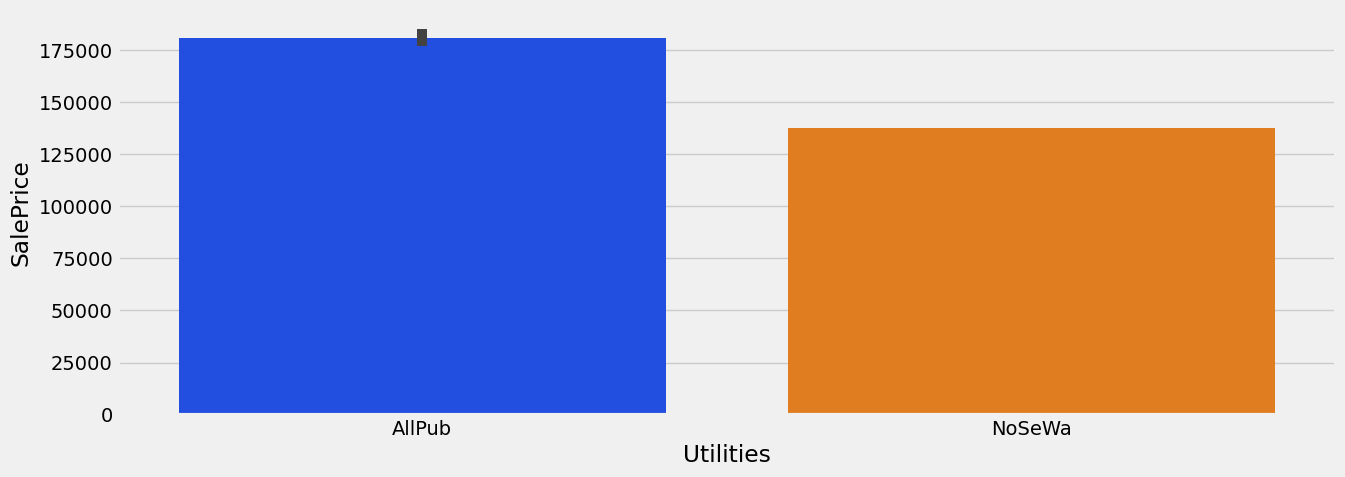

In [56]:
plt.figure(figsize=(14, 5))
plot = sns.barplot(x='Utilities', y = 'SalePrice', palette = 'bright', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### Street vs SalePrice

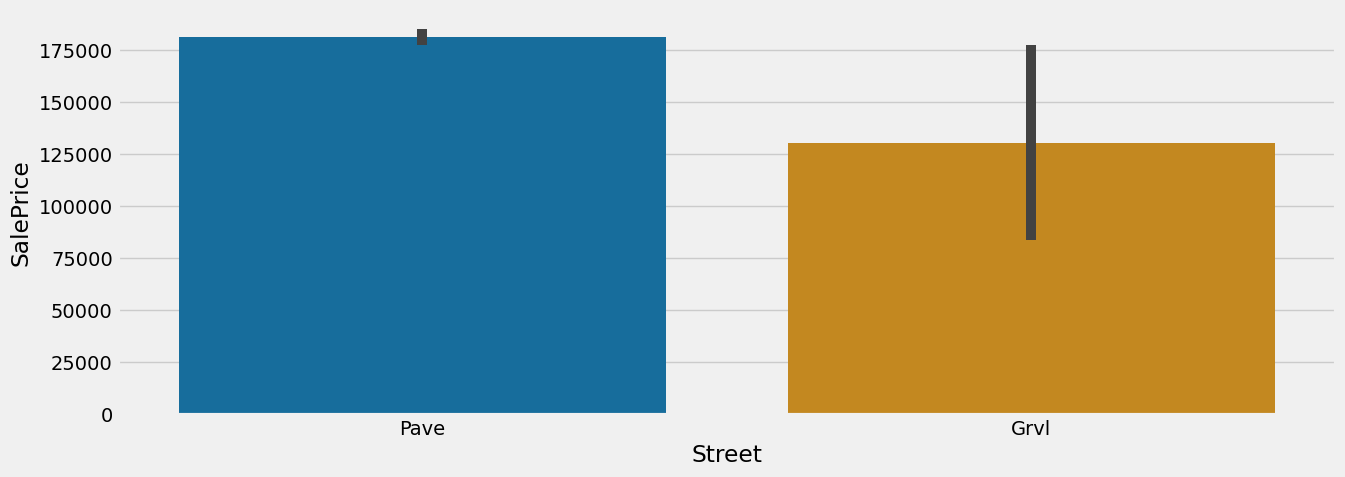

In [57]:
plt.figure(figsize=(14, 5))
plot = sns.barplot(x='Street', y = 'SalePrice', palette = 'colorblind', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### LandSlope vs SalePrice

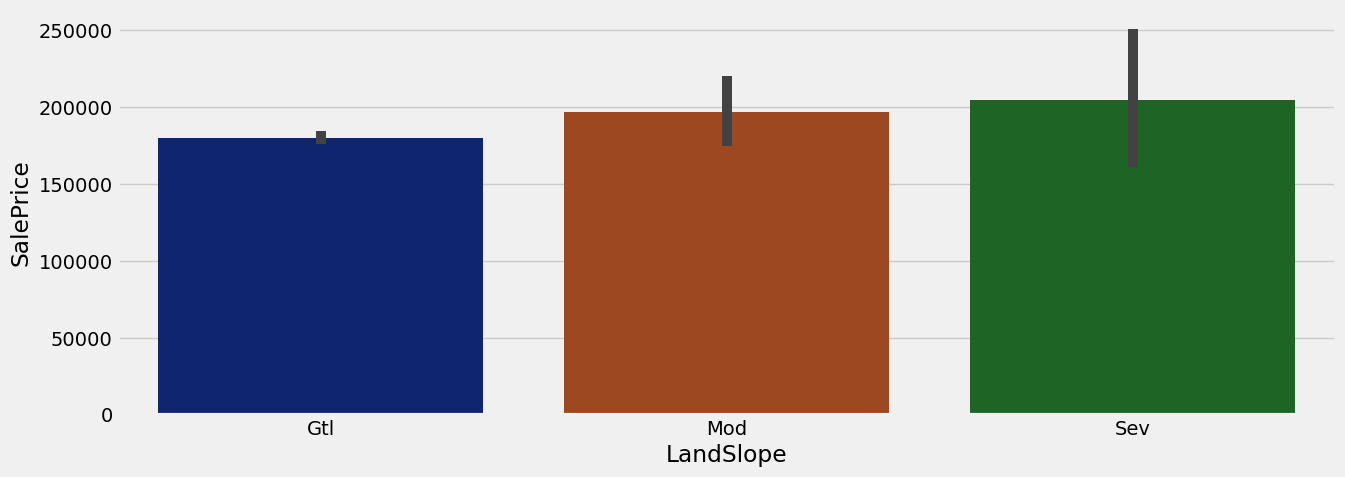

In [58]:
plt.figure(figsize=(14, 5))
plot = sns.barplot(x='LandSlope', y = 'SalePrice', palette = 'dark', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### Functional vs SalePrice

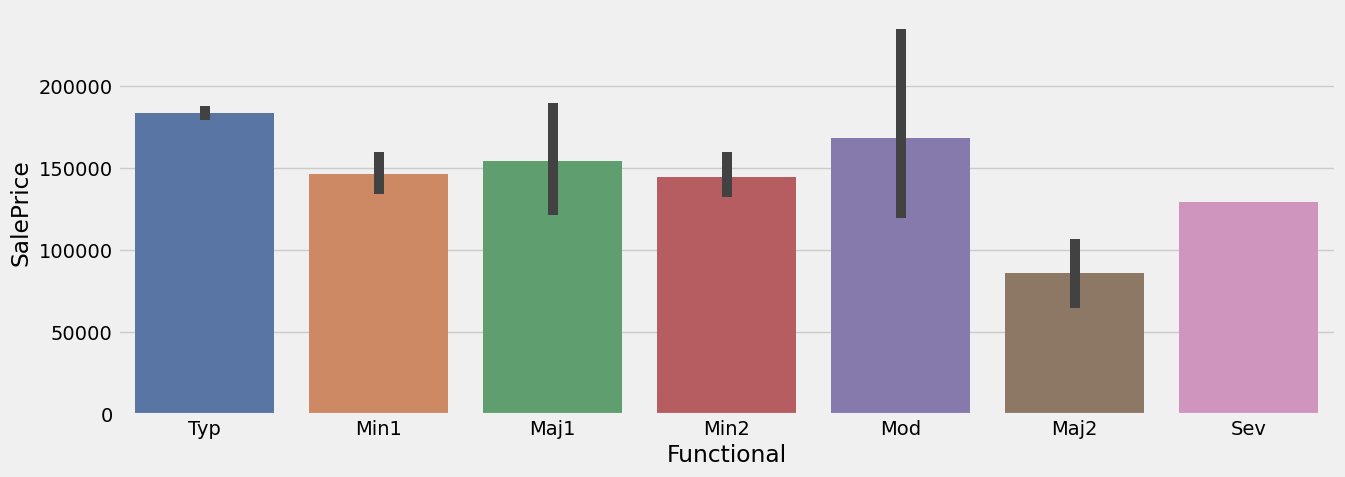

In [59]:
plt.figure(figsize=(14, 5))
plot = sns.barplot(x='Functional', y = 'SalePrice', palette = 'deep', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### LotConfig vs SalePrice

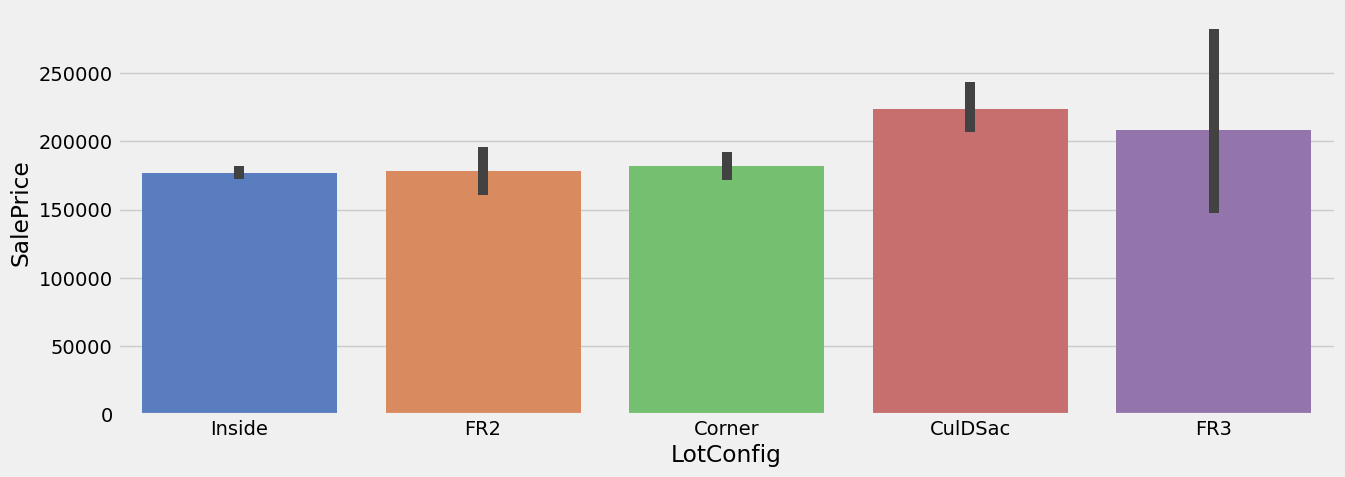

In [60]:
plt.figure(figsize=(14, 5))
plot = sns.barplot(x='LotConfig', y = 'SalePrice', palette = 'muted', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

# Feature Engineering

## Total Porch Area

In [61]:
df['TotPorch'] = df['3SsnPorch'] + df.EnclosedPorch + df.ScreenPorch + df.OpenPorchSF
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotPorch
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,61
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,42
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,307
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,84


## House Rate Condition and Material

In [62]:
df['HouseRate_Cond_and_Material'] = df.OverallQual + df.OverallCond

In [63]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotPorch,HouseRate_Cond_and_Material
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,61,12
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,14
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,42,12
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,307,12
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,84,13


In [64]:
df['HouseRate_Cond_and_Material'] = pd.cut(df['HouseRate_Cond_and_Material'],bins= [0,2,4,6,8,10,12,14,16,18,20], labels=['Very Poor','Poor','Fair','Below Average','Average','Above Average','Good',
                                                                                                                          'Very Good','Excellent','Very Excellent'])

In [65]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotPorch,HouseRate_Cond_and_Material
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,61,Above Average
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,Good
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,42,Above Average
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,307,Above Average
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,84,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,694,0,1647,0,0,2,1,3,1,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000,40,Above Average
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,0,0,2073,1,0,2,0,3,1,TA,Min1,2,TA,Attchd,Unf,2,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000,0,Above Average
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1152,0,2340,0,0,2,0,4,1,Gd,Typ,2,Gd,Attchd,RFn,1,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500,60,Very Good


## Age of House

In [66]:
df['Age_of_House'] = df['YrSold'] - df['YearBuilt']

In [67]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotPorch,HouseRate_Cond_and_Material,Age_of_House
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,61,Above Average,5
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,Good,31
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,42,Above Average,7
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,307,Above Average,91
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,84,Good,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,694,0,1647,0,0,2,1,3,1,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000,40,Above Average,8
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,0,0,2073,1,0,2,0,3,1,TA,Min1,2,TA,Attchd,Unf,2,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000,0,Above Average,32
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1152,0,2340,0,0,2,0,4,1,Gd,Typ,2,Gd,Attchd,RFn,1,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500,60,Very Good,69


## Save to CSV

In [68]:
df.to_csv('train_new.csv', index= True)